<h1> APS 1: Redes Sociais </h1>

Professor: Marcelo Hashimoto

Alunos: Henrique Martinelli Frezzatti, Lívia Sayuri Makuta e Rodrigo Coelho.


<h2> Introdução </h2>

Na presente atividade um grafo será construído a partir do Dataset escolhido pelo grupo: soc-pages-sport retirado do tópico "social networks" do site: https://networkrepository.com/. Essa base de dados escolhida utiliza dados coletados de páginas do Facebook do período de novembro de 2017. Esse dataset representa páginas verificadas do Facebook de diferentes categórias que são curtidas mutuamente. Sendo assim, os nós representam as páginas e as arestas são as curtidas mútuas entre elas.


Por meio desse grafo será feita uma análise exploratória e uma análise visual a fim de aprender a mexer com as ferramentas e a infraestrutura apresentada na disciplina e de mesmo modo aprender a interpretar bases de dados a partir dos conceitos apresentados até aqui pelo curso.


<h2> 1- Leitura dos dados</h2>

Para isso vamos começar carregando os dados do dataset e os lendo a fim de entender por quais dados são formados e a partir disso saber como iremos utilizar os dados como vértices e arestas.

Primeiramente, vamos abrir os documentos do dataset: fb-pages-sport.edges e fb-pages-sports.nodes, e depois vamos utilizar a função readlines() do python que retorna todas as linhas do arquivo como uma lista na qual cada linha é um item dessa lista.


In [1]:
# Lendo os arquivos e usando readlines()
file1 = open('./fb-pages-sport.edges', 'r')
file2 = open('./fb-pages-sport.nodes', 'r')
Lines1 = file1.readlines()
Lines2 = file2.readlines()

Agora vamos printar apenas 5 linhas dos vértices e das arestas como primeiro contato com o dataset:

In [2]:
# Lendo apenas 5 linhas dos vértices e arestas como teste

## Vértices:

print("VÉRTICES -----------------------------------------\n")
count = 0
for line in Lines2:
    print("Linha{}: {}".format(count, line.strip()))
    if count == 4:
        print('\n')
        break
    count +=1 
    
## Arestas:

print("ARESTAS -----------------------------------------\n")
count = 0
for line in Lines1:
    print("Linha{}: {}".format(count, line.strip()))
    if count == 4:
        print("\n")
        break
    count +=1 


VÉRTICES -----------------------------------------

Linha0: id,name,new_id
Linha1: 1639020429716914,"Quinn ""Moose"" Ojinnaka",1947
Linha2: 156191961253979,Villanova Softball,874
Linha3: 165554913638633,Miriam Ziegler & Severin Kiefer,13075
Linha4: 500839003318392,Eliaquim Mangala Officiel,11252


ARESTAS -----------------------------------------

Linha0: 0,7061
Linha1: 0,5911
Linha2: 0,13203
Linha3: 0,13704
Linha4: 0,11031




Com os prints acima podemos ver que no documento dos vértices existem três colunas: id, name e new_id que representam, respectivamente, um id antigo com números grandes, o nome das páginas do Facebook presentes na base de dados e um novo id com números menores que facilitam um pouco mais a identificação. Além disso, no documento das arestas simplesmente existem os pares de vértices que estão conectados entre si. 

<h2> 2-Construção do Grafo e Análise Exploratória</h2>

O próximo passo é começar a construção do grafo, e para isso iremos começar adicionando as vértices descritas no documento ao grafo. Mas antes, como foi mostrado nos tutoriais da disciplina, precisamos importar a seguinte biblioteca para visualização de grafos: netpixi. Ademais, também é importante salientar que o grafo a ser criado é não-dirigido, e isso porque o sentido das arestas nesse caso não importam, já que estamos trabalhando com curtidas mútuas entre páginas do Facebook.

In [3]:
# Importando a biblioteca netpixi
from netpixi.integration.gt import Graph

# Criando um grafo não-dirigido
g = Graph(directed=False) 


Com o grafo criado, agora iremos populá-lo com a informação dos vértices do dataset, o que é feito com a função: 'add_vertex'. Outrossim, por simplicidade decidimos adotar a coluna "new_id" como o identificador do vértice do grafo. 

In [4]:
# Adicionando os vértices ao grafo:

count = 0
for line2 in Lines2:
    linha2 = line2.strip().split(',')
    if count == 0:
        print(f'A linha inicial possui apenas os títulos das colunas: {linha2}')
    else:
        #print("Id do vértice: ", linha2[len(linha2)-1])  [print de debug]
        g.add_vertex(linha2[len(linha2)-1])
    count +=1 




A linha inicial possui apenas os títulos das colunas: ['id', 'name', 'new_id']


<h3> Número de vértices </h3>

Para conferir se todos os vértices foram criados podemos utilizar a função 'num_vertices' que faz essa contagem a partir do grafo referenciado. Como validação, segundo os dados oficiais do dataset, sabemos que ele possui aproximadamente 13.900 vértices (nós).

In [5]:
n = g.num_vertices()
print('O número de vértices do grafo é :', n)

O número de vértices do grafo é : 13864


Como visto, os vértices já estão formados e seu número é coerente com a informação conhecida. Agora, para concluir a montagem do grafo é necessário conectar esses vértices por meios das arestas. E isso foi feito através da função 'add_edge', como mostrado a seguir:

In [6]:
for line1 in Lines1:
    linha1 = line1.strip().split(',')
    #print("Arestas: ", linha1) [print de debug]
    g.add_edge(linha1[0], linha1[1])


<h3>Número de arestas</h3>

Mais uma vez iremos conferir se todas as arestas foram criadas corretamente, e para isso basta utilizar a função 'num_edges'. Além disso, como validação, o número de arestas também é conhecido e segundo o autor do dataset é de aproximadamente 86.800.


In [7]:
m = g.num_edges()
print('número de arestas de g:', m)

número de arestas de g: 86808


**Observação:** para a adição das arestas os dados foram um pouco alterados, isto é, foi tomada a liberdade de excluir arestas entre um mesmo nó. Isso porque não é uma informação muito relevante no presente contexto e porque a própria função que foi utilizada anteriormente para criar as arestas não permite que isso seja feito.

<h3> Adicionando propriedades ao grafo</h3>

A fim de melhorar a visualização do grafo, podemos adicionar algumas propriedades que são as características das vértices e das arestas. No caso em questão apenas as vértices possuem mais uma característica que é o nome da página na rede social. Assim, para cada nó será adicionado como um rótulo (label) o nome da página ao qual o nó se refere.



Para fazer isso, basta utilizar a função 'add_vp' e adicionar a coluna referente a nova propriedade da vértice. Isso pode ser visto abaixo:

In [9]:
g.add_vp('nome')

Depois, basta associar cada vértice ao nome. Isso envolve primeiro fazer uma operação de consulta do nó existente e depois associar seu novo campo, no caso 'nome', ao vértice. 

In [10]:
# Adicionando os vértices ao grafo:

count = 0
for line2 in Lines2:
    linha2 = line2.strip().split(',')
    if count == 0:
        print(f'A linha inicial possui apenas os títulos das colunas: {linha2}')
    else:
        #print("Id do vértice: ", linha2[1]) [print de debug]
        g.get_vertex(linha2[len(linha2)-1])['nome'] = linha2[1]
    count +=1 


A linha inicial possui apenas os títulos das colunas: ['id', 'name', 'new_id']


Para testar se a propriedade foi adicionada ao vértice do grafo, podemos fazer uma operação de consulta com a função 'get_vertex' e conferir se o nome associado àquele nó é coerente com a base de dados. Como visto no tópico "Leitura de Dados", para o id 874 o esperado era: Villanova Softball, abaixo isso é validado. 

In [11]:
exemplo = g.get_vertex('874')

print(exemplo['nome'])

Villanova Softball


<h3> Análise sobre vizinhos, predecessores e sucessores </h3>

O vizinho de um vértice é quem está conectado à ele por meio das arestas e se o sentido da aresta for entrando, isso significa que aquele nó é predecessor de seu vizinho, e se o sentido for saindo, significa que o seu vizinho é seu sucessor. Mas como nosso grafo é não dirigido, não há sucessores e predecessores, todos são vizinhos,



E para iterar sobre os vizinhos de um vértice, basta utilizar o método iter_all_neighbors. Como há muitos vizinho, vamos printar apenas os 5 primeiros para ter uma noção.

In [15]:
limitador = 0
for u in g.all_vertices():
    print(f'vizinhos de {u}:', end=' ')
    if u == 4:
        break
    for v in u.iter_all_neighbors():
        print(v, end=' ')
    limitador +=1
    print()

vizinhos de 1947: 5610 3390 
vizinhos de 874: 2334 8558 9630 5427 1743 1685 
vizinhos de 13075: 13760 970 3170 6405 6499 9640 535 
vizinhos de 11252: 13142 11524 13735 3572 4182 4319 5497 7029 8134 164 812 3334 
vizinhos de 5713: 

Mais uma vez como teste, podemos iterar sobre as arestas de um vértice utilizando o método iter_all_edges. De mesmo modo, vamos limitar a vizualização a apenas 5 arestas.

In [16]:
limitador = 0
for u in g.all_vertices():
    print(f'arestas de {u}:', end=' ')
    if limitador == 4:
        break
    for e in u.iter_all_edges():
        print(e, end=' ')
    limitador+=1
    print()

arestas de 1947: (1947, 5610) (1947, 3390) 
arestas de 874: (874, 2334) (874, 8558) (874, 9630) (874, 5427) (874, 1743) (874, 1685) 
arestas de 13075: (13075, 13760) (13075, 970) (13075, 3170) (13075, 6405) (13075, 6499) (13075, 9640) (13075, 535) 
arestas de 11252: (11252, 13142) (11252, 11524) (11252, 13735) (11252, 3572) (11252, 4182) (11252, 4319) (11252, 5497) (11252, 7029) (11252, 8134) (11252, 164) (11252, 812) (11252, 3334) 
arestas de 5713: 

<h3> Salvando e carregando o arquivo </h3>

O último passo para a construção do grafo é salvá-lo no formato ZipNet para depois carregá-lo e renderizá-lo. Para fazer isso, mais uma vez vamos utilizar a biblioteca netpixi. 


In [17]:
from netpixi.integration.gt import *

Para salvar um grafo no formato ZipNet, basta chamar o método 'gt_save':

In [ ]:
gt_save(g, '../datasets/versao1.net.gz')

Depois, para carregá-lo podemos utilizar o método 'gt_load':

In [ ]:
g = gt_load('../datasets/versao1.net.gz')

In [ ]:
import netpixi

Por fim, basta renderizá-lo. Lembrando que isso pode ser um pouco lento dependendo de quantos dados foram utilizados para fazer a construção dos vértices e arestas. No nosso caso não foram muitos, mas o computador utilizado para rodar os códigos também tem influência nisso. 

In [ ]:
r = netpixi.render('../datasets/versao1.net.gz')

Além disso, vamos adicionar um estilo para melhorar a visualização e adicionar a propriedade do vértice.

In [ ]:
r.graph(color=0xffffff)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color=0x000000, size=10)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x000000, width=1, curve1=1, curve2=1)

r.vertex_set_key('nome')

<h2> Densidades, estatítica e histogramas </h2>

<h3> Densidade </h3>

Como foi visto nos tutoriais, os número absolutos de arestas é importante, mas não são suficientes para ter entendimento geral da situação. Logo, é igualmente importante calcular a relação entre o número de arestas existentes com o número de arestas máximo possível.

Como o grafo é não dirigido, bsata fazer o produto do número de vértices com o número de vértices menos 1 e depois dividir esse resultado por 2.


Mas antes, para os próximos passos será importante que duas bibliotecas já estejam importadas, a seaborn e a regression integration:

In [18]:
import seaborn
#from netpixi.integration.gt import *
from regression.integration.gt import *

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/usr/local/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/usr/local/lib/python3.10/site-packages/setupt

O aviso acima pode ser ignorado.

In [19]:
if g.is_directed():
    max_edges = n * (n - 1)
    print("O grafo é dirigido e o número máximo de arestas é", end=' ')
else:
    max_edges = n * (n - 1) // 2
    print("O grafo é não-dirigido e o número máximo de arestas é", end=' ')

print(max_edges, end=' ')

O grafo é não-dirigido e o número máximo de arestas é 96098316 

Com o número máximo de arestas possíveis calculado, podemos agora calcular a densidade para saber quantos por cento em relação ao máximo temos em nosso grafo.

In [20]:
d = m / max_edges
print(f'A densidade de arestas é de {d*100}%')

A densidade de arestas é de 0.09033248824048072%


Com isso pode ser visto que embora o número de arestas presentes no grafo pareça ser grande em relação a número de vértices (cerca de 6,26 vezes o número de vértices), ele  representa apenas cerca de 0,09 % por cento do máximo possível.


<h3> Estatísticas e histogramas </h3>

Como citado anteriormente, cada vértice tem o número de arestas que entram (in-degree), o número de arestas que saem (out-degree), e o degree que é a soma desses dois valores. Antes de plotar os histogramas primeiro iremos obter todos esses dados através de três métodos: o `in_degree`, o `out_degree` e o `total_degree`.


Mas antes, vamos formatar os dados em um dataframe do pandas para facilitar a visualização dessas novas características que serão adicionadas ao dataset para também tornar mais fácil a construção dos histogramas e o cálculo de estatística:
    


In [30]:
data = gt_data(g)
data

,nome
id,
1947,"""Quinn """"Moose"""" Ojinnaka"""
874,Villanova Softball
13075,Miriam Ziegler & Severin Kiefer
11252,Eliaquim Mangala Officiel
5713,Alfonso Celis Jr.
...,...
5510,Hendrik Bonmann
10047,Somos Cowboys
6808,Uthappa SK


In [31]:
in_degrees = []
for v in g.all_vertices():
    in_degrees.append(v.in_degree())

out_degrees = []
for v in g.all_vertices():
    out_degrees.append(v.out_degree())

degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())

In [32]:
data['in_degree'] = in_degrees
data['out_degree'] = out_degrees
data['degree'] = degrees
data

,nome,in_degree,out_degree,degree
id,,,,
1947,"""Quinn """"Moose"""" Ojinnaka""",0,2,2
874,Villanova Softball,0,6,6
13075,Miriam Ziegler & Severin Kiefer,0,7,7
11252,Eliaquim Mangala Officiel,0,12,12
5713,Alfonso Celis Jr.,0,1,1
...,...,...,...,...
5510,Hendrik Bonmann,0,4,4
10047,Somos Cowboys,0,2,2
6808,Uthappa SK,0,2,2


Como pode ser visto, por ser um grafo não- dirigido o número de arestas que saem é o mesmo número das arestas totais. Isso porque nesse caso o sentido do grafo não é importante, as arestas estão indicando apenas os vizinhos.

Por fim, agora iremos plotar os histogramas e mostrar as estatísticas referentes a cada degree:

count    13864.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: in_degree, dtype: float64

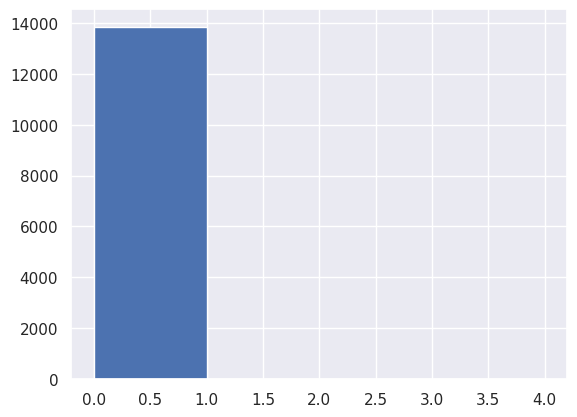

In [35]:
data['in_degree'].hist(bins=range(5))
data['in_degree'].describe()

Como era esperado, o `in_degree` é composto por zeros, e por isso limitamos a representação do eixo `x` do histograma à 5.

count    13864.000000
mean        12.522793
std         18.018046
min          1.000000
25%          3.000000
50%          7.000000
75%         15.000000
max        468.000000
Name: out_degree, dtype: float64

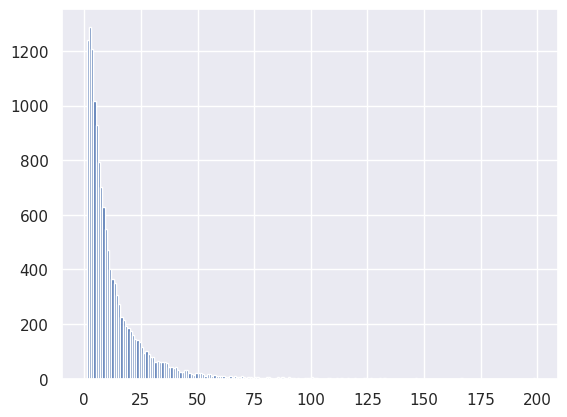

In [38]:
data['out_degree'].hist(bins=range(200))
data['out_degree'].describe()

Por sua vez, o eixo `x` do `out_degree` foi limitado a 200, embora seu valor máximo seja 468. Mas como podemos ver pelas estatísticas cerca de 75% do número de `out_degrees` é menor que 15. Portanto, restringindo o histograma dessa maneira conseguimos ver que de fato as densidades são maiores nos valores abaixo de 15. 

count    13864.000000
mean        12.522793
std         18.018046
min          1.000000
25%          3.000000
50%          7.000000
75%         15.000000
max        468.000000
Name: degree, dtype: float64

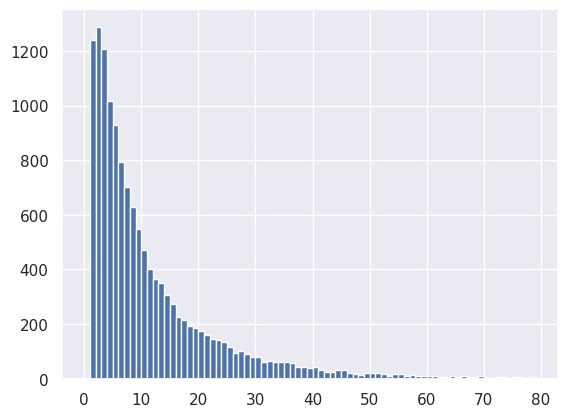

In [37]:
data['degree'].hist(bins=range(80))
data['degree'].describe()

Por fim, como o histograma dos `degrees` é o mesmo que o do `out_degrees`, resolvemos restringir ainda mais o valor máximo do eixo `x` do histograma para 80. Assim fica claro que de fato a quantidade de arestas por vértice está mais concentrada nos valores iniciais do eixo `x`, o que também é corroborado pela mediana que aponta que 50% dos valores são menores que 7.

<h2> 3- Análise visual do grafo </h2>

Como foi estudado em aulas anteriores, a maneira que os vértices são dispostos em um grafo pode esconder informações importantes e interessantes a cerca da estrutura do grafo. E é por isso que a biblioteca já usadas na APS: a netpixi, e a graph-tool tem ferramentas para que possamos visualizar isso. 

E para isso nós escolhemos dois algoritmos: um que é baseado na ideia de `force-directed graph drawing` que utiliza as arestas como uma força gravitacional que aproxima vértices conectados e afasta os desconectados - o que pode revelar a existência de grupos (SFDP), e outro que a partir de um vértice escolhido como raiz, posiciona em volta dessa raiz os seus vizinhos (Radial).

A implementação desses dois algoritmos pode ser vista abaixo:


<h3> SFDP </h3>

In [ ]:
g = gt_load('../datasets/versao1.net.gz')
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'exemplo2.net.gz')
netpixi.render('exemplo2.net.gz');

In [ ]:
r.graph(color=0xffffff)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color=0x000000, size=10)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x000000, width=1, curve1=1, curve2=1)

r.vertex_set_key('nome')

<h3>Radial</h3>



In [ ]:
g = gt_load('../datasets/versao1.net.gz')
m = gt_draw.radial_tree_layout(g, 6932) # vértice com identificador 11 é escolhido como raiz
gt_move(g, m)
gt_save(g, 'exemplo3.net.gz')
r = netpixi.render('exemplo3.net.gz');

In [ ]:
r.graph(color=0xffffff)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color=0x000000, size=10)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x000000, width=1, curve1=1, curve2=1)

r.vertex_set_key('nome')